# XOR : Logistic Regression, Eager Excuetion
    - XOR 문제를 Logistic Regression을 활용해 풀어보기

### 기본 Library 선언 및 Tensorflow 버전 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

tf.random.set_seed(777)             # 초기화할 때 동일한 상태에서 실행되도록

print(tf.__version__)

2.1.0


### 기본 Data
* x_data : 2차원 배열 (0과 1)
* y_data : 0과 1로 구분 (input이 같을 때 0, 다를 때 1)
* 빨강, 파랑으로 0과 1을 구분해서 표시 

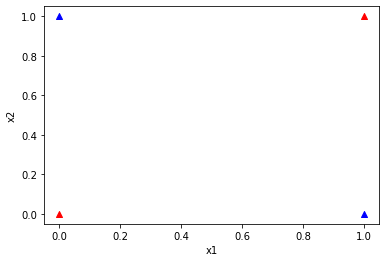

In [2]:
x_data = [[0, 0],
         [0, 1],
         [1, 0],
         [1, 1]]
y_data = [[0], [1], [1], [0]]

plt.scatter(x_data[0][0], x_data[0][1], c='red', marker='^')
plt.scatter(x_data[3][0], x_data[3][1], c='red', marker='^')
plt.scatter(x_data[1][0], x_data[1][1], c='blue', marker='^')
plt.scatter(x_data[2][0], x_data[2][1], c='blue', marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Tensorflow Eager

### 위 Data를 기준으로  XOR 모델 구현

* Tesorflow data API를 통해 학습시킬 값 담기 (Batch Size: 한 번에 학습시킬 Size)
* preprocess function으로 feature, labels는 실제 학습에 씅르 Data 연산으 위한 Type 맞추기

(위 그래프에서 Linear한 function으로 2가지를 분류할 수 없음)

In [3]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

## 1. Logistic Regression으로 XOR 모델 구현

### W와 b는 학습을 통해 생성되는 모델에 쓰이는 Weight와 Bias
(초기값 : variable 0 또는 Random 값으로 가능)

In [4]:
W = tf.Variable(tf.zeros((2,1)), name='weight')
b = tf.Variable(tf.zeros((1,)), name='bias')
print("W={}, \nB={}".format(W.numpy(), b.numpy()))

W=[[0.]
 [0.]], 
B=[0.]


### Sigmoid 함수를 가설로 선언
* Sigmoid는 아래 그래프와 같이 0과 1의 값만 리턴
 
 : tf.sigmoid(tf.matmul(X, W) +b) 와 같음
 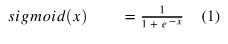

In [5]:
def logistic_regression(features):
    hypothesis = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

### 가설을 검증할 Cost 함수를 정의

In [6]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features))+(1-labels)*tf.math.log(1-hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
                           

### 추론한 값을 0.5를 기준으로 0 또는 1 값을 리턴

In [7]:
def accuracy_fn(hypothesis, labels):
    predicted =tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

### GradientTape를 통해 경사값을 계산

In [8]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features), features, labels)
        return tape.gradient(loss_value, [W,b])

### Tensorflow를 통한 실행을 위해 Session 선언
    - 위의 Data를 Cost 함수를 통해 학습시킨 후 모델을 생서

In [9]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.6931
Iter: 200, Loss: 0.6931
Iter: 300, Loss: 0.6931
Iter: 400, Loss: 0.6931
Iter: 500, Loss: 0.6931
Iter: 600, Loss: 0.6931
Iter: 700, Loss: 0.6931
Iter: 800, Loss: 0.6931
Iter: 900, Loss: 0.6931
Iter: 1000, Loss: 0.6931
W = [[0.]
 [0.]], B = [0.]
Testset Accuracy: 0.5000
